In [1]:
# import statements
import import_ipynb
import numpy as np
import pandas as pd
from format_data import LoadAndFormatData
from bin_portfolio import BinPortfolio
from sharpe_ratio import SharpeRatio
from data_update_michael import FindCoefficients

importing Jupyter notebook from format_data.ipynb
importing Jupyter notebook from bin_portfolio.ipynb
importing Jupyter notebook from sharpe_ratio.ipynb
importing Jupyter notebook from data_update_michael.ipynb


In [2]:
# Load and modify the data
df = LoadAndFormatData()
df.head()

,A2ME,BEME,BEME_adj,BEME_ind,CEI,DATE,DEC_ME,DEC_SHROUT,Div,Div_ann,...,sale,sale_ind,sales_g,sga2s,spread_mean,std_turn,std_vol,suv,RET_t+1,mkt
0,NaN,NaN,NaN,0.824752,NaN,1986-01-31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.257143,0.009116
1,NaN,NaN,NaN,0.825905,NaN,1986-02-28,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.076998,0.212080,7804.560824,NaN,0.365385,0.009116
2,NaN,NaN,NaN,0.825905,NaN,1986-03-31,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.055511,0.107977,3973.567637,-0.363314,-0.098592,0.009116
3,NaN,NaN,NaN,0.825015,NaN,1986-04-30,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.037231,0.174533,6422.825870,-0.571056,-0.222656,0.009116
4,NaN,NaN,NaN,0.824672,NaN,1986-05-31,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0.048336,0.150228,5527.502665,-0.708679,-0.005025,0.009116


In [3]:
# Run OLS and determine the coefficients
subset = df[df['DATE'] == '2023-01-31']
subset.head()

,A2ME,BEME,BEME_adj,BEME_ind,CEI,DATE,DEC_ME,DEC_SHROUT,Div,Div_ann,...,sale,sale_ind,sales_g,sga2s,spread_mean,std_turn,std_vol,suv,RET_t+1,mkt
4033,0.372175,0.300876,-0.205358,0.506234,0.037643,2023-01-31,3.015299e+06,19089.0,0.0,2.665999,...,1144.579,365862.147,0.119899,0.197834,0.001713,0.384852,74003.690396,0.209738,-0.014585,0.034799
4536,0.540833,0.252106,-0.156684,0.408790,-4.884325,2023-01-31,1.095848e+05,26925.0,0.0,0.000000,...,140.966,2656305.584,0.237390,0.147539,0.011440,0.135287,36425.942427,-0.589648,0.092847,0.012912
5283,0.917032,0.385121,-0.067338,0.452459,-0.604233,2023-01-31,2.684632e+06,27997.0,0.0,0.000000,...,3368.865,835692.186,-0.006350,0.042673,0.001185,0.848834,234706.222689,-0.297358,-0.001042,0.071634
7037,0.514566,0.391178,-0.115056,0.506234,0.289530,2023-01-31,4.848945e+04,6177.0,0.0,0.000000,...,23.481,365862.147,-0.262763,0.223074,0.012456,0.061457,3834.303907,0.422182,-0.068479,0.025283
9953,1.140592,0.881976,0.429517,0.452459,NaN,2023-01-31,5.066578e+04,11594.0,0.0,0.000000,...,184.115,835692.186,1.452512,0.051902,0.016740,0.117628,13742.587884,0.960779,-0.015717,-0.023426


In [8]:
# TODO: Is RET_t+1 necessary? What is it used for as opposed to RET?
dependent_var = ['RET']
regressors = ["mkt", "roic", "BEME", 'ME']
all_dataframe_vars = regressors + dependent_var + ['DATE', 'PERMNO', 'RET_t+1']

sharpe_ratios = []
dates = []
pnl_curves = []

for month in sorted(df['DATE'].unique()):
    print(month)
    currentData = df[df['DATE'] == month]
    currentData = currentData[all_dataframe_vars]
    currentData = currentData.dropna()
    if len(currentData.index) == 0:
        continue
    try:
        # Find the correct coefficients
        go_long = FindCoefficients(dataframe=currentData, regressors=regressors)
        # NOTE: This would find the correlations for the t-th time period. 
        # Forming the portfolio on this would be assuming that the relationship for the next time period will be similar to the one for this time period.

        # Form the portfolio
        portfolio = BinPortfolio(dataframe=currentData, all_dataframe_vars=all_dataframe_vars, vars_to_bin=regressors, go_long=go_long)
        dates.append(month)
        # Calculate the Sharpe Ratio
        # TODO: The sharpe ratio is the one that takes a while. Not surprising
        sharpe_ratios.append(SharpeRatio(portfolio=portfolio, df=df, rf=0))

        # If the sharpe ratio is the one taking too long, is there a way we can memoize it?
        # Calculate the pnl curve. TODO
        pnl_curves.append(1)
    except ValueError:
        continue


1955-01-31 00:00:00
1955-02-28 00:00:00
1955-03-31 00:00:00
1955-04-30 00:00:00
1955-05-31 00:00:00
1955-06-30 00:00:00
1955-07-31 00:00:00
1955-08-31 00:00:00
1955-09-30 00:00:00
1955-10-31 00:00:00
1955-11-30 00:00:00
1955-12-31 00:00:00
1956-01-31 00:00:00
1956-02-29 00:00:00
1956-03-31 00:00:00
1956-04-30 00:00:00
1956-05-31 00:00:00
1956-06-30 00:00:00
1956-07-31 00:00:00
1956-08-31 00:00:00
1956-09-30 00:00:00
1956-10-31 00:00:00
1956-11-30 00:00:00
1956-12-31 00:00:00
1957-01-31 00:00:00
1957-02-28 00:00:00
1957-03-31 00:00:00
1957-04-30 00:00:00
1957-05-31 00:00:00
1957-06-30 00:00:00
1957-07-31 00:00:00
1957-08-31 00:00:00
1957-09-30 00:00:00
1957-10-31 00:00:00
1957-11-30 00:00:00
1957-12-31 00:00:00
1958-01-31 00:00:00
1958-02-28 00:00:00
1958-03-31 00:00:00
1958-04-30 00:00:00
1958-05-31 00:00:00
1958-06-30 00:00:00
1958-07-31 00:00:00
1958-08-31 00:00:00
1958-09-30 00:00:00
1958-10-31 00:00:00
1958-11-30 00:00:00
1958-12-31 00:00:00
1959-01-31 00:00:00
1959-02-28 00:00:00


<Axes: >

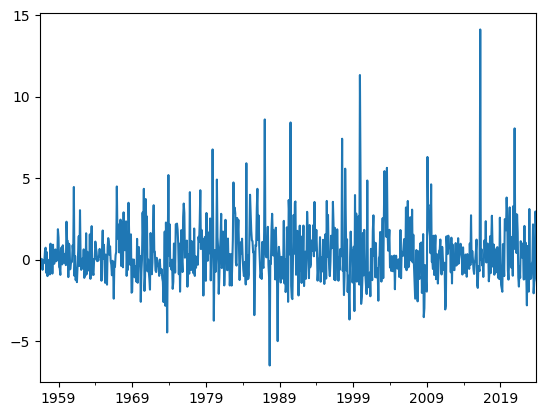

In [9]:
sharpes = pd.Series(sharpe_ratios, index=dates)
sharpes.plot()

In [10]:
np.mean(sharpe_ratios)

0.366933312437598